In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-price-dataset/BTC_ALL_graph_coinmarketcap.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv('/kaggle/input/bitcoin-price-dataset/BTC_ALL_graph_coinmarketcap.csv', delimiter=';')

In [4]:
print(data.columns)

Index(['open', 'high', 'low', 'close', 'volume', 'marketCap', 'timestamp'], dtype='object')


In [5]:
X = data[['open', 'high', 'low', 'volume', 'marketCap']]
y = data['close']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()

In [8]:
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)


In [10]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 40061.26163985876


In [11]:
new_data = pd.DataFrame({'open': 29245.5155124623, 'high': 29952.0285526597, 'low': 29114.0212362778, 'volume': 14652199272.27,
                         'marketCap': 566661285145.37}, index=[0])

In [12]:
predicted_price = model.predict(new_data)
print('Predicted Price:', predicted_price)

Predicted Price: [29822.1418296]


In [13]:
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.9998129536932032


In [14]:
threshold = 800  # Define the threshold value
diff = abs(y_pred - y_test)
within_threshold = diff[diff <= threshold]
percentage_within_threshold = (within_threshold.shape[0] / y_test.shape[0]) * 100
print('Percentage within threshold:', percentage_within_threshold)

Percentage within threshold: 98.63945578231292


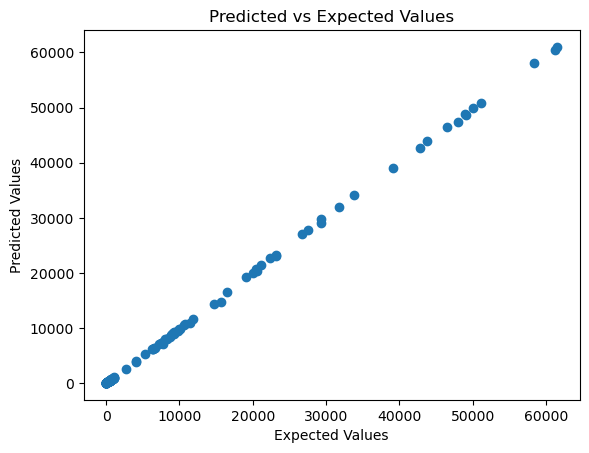

In [15]:
plt.scatter(y_test, y_pred)
plt.xlabel('Expected Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Expected Values')
plt.show()

**Random Forest Regressor:**

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
print('Random Forest Mean Squared Error:', rf_mse)

Random Forest Mean Squared Error: 66456.47789342618


In [18]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_y_pred)
print('Linear Regression Mean Squared Error:', linear_mse)

Linear Regression Mean Squared Error: 40061.26163985876


**Using Neural Networks**

In [19]:
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), verbose=0)